# Implementación de una red LSTM sencilla para practicar

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [41]:
# Intentamos leer el archivo, tal y como nos viene nos genera errores que debemos solventar con la r y luego especificando el encoding
df = pd.read_csv(r"DatosHistoricos_data.csv", sep = ";", encoding='latin-1')
df.head()

,Máximo,Mínimo,Media,Fecha máximo,Fecha mínimo,Máxima altura,Mínima altura,Media altura,Fecha máximo .1,Fecha mínimo.1,fecha,Máxima pluviometría,Fecha máximo,hrMedia,tmed,velmedia,presMedia
0,585,"483,28",545,01/01/2010 22:30,01/01/2010 0:00,"2,29","2,04","2,19",01/01/2010 22:30,01/01/2010 0:00,01/01/2010 0:00,1,01/01/2010 0:15,57.0,9,"6,7","976,25"
1,585,"532,12",556,02/01/2010 0:00,02/01/2010 21:45,"2,29","2,16","2,22",02/01/2010 0:00,02/01/2010 21:45,02/01/2010 0:00,0,02/01/2010 0:15,71.0,"5,6","2,8","986,35"
2,528,"450,8",498,03/01/2010 0:00,03/01/2010 23:30,"2,15","1,96","2,08",03/01/2010 0:00,03/01/2010 23:30,03/01/2010 0:00,"1,2",03/01/2010 19:15,83.0,"5,6","2,5","986,4"
3,451,386,408,04/01/2010 0:00,04/01/2010 19:00,"1,96","1,8","1,86",04/01/2010 0:00,04/01/2010 19:00,04/01/2010 0:00,"10,8",05/01/2010 0:00,94.0,"6,2","1,7","978,45"
4,418,386,405,05/01/2010 8:15,05/01/2010 0:00,"1,88","1,8","1,85",05/01/2010 8:15,05/01/2010 0:00,05/01/2010 0:00,15,05/01/2010 10:30,80.0,"7,2","6,1","972,9"


In [42]:
df.columns

Index(['Máximo', 'Mínimo            ', 'Media           ',
       'Fecha máximo                    ', 'Fecha mínimo', 'Máxima altura',
       'Mínima altura          ', 'Media altura       ',
       'Fecha máximo                    .1', 'Fecha mínimo.1',
       'fecha         ', 'Máxima pluviometría', 'Fecha máximo      ',
       'hrMedia', 'tmed', 'velmedia', 'presMedia'],
      dtype='object')

In [43]:
df =df.drop(["Máximo",'Mínimo            ','Fecha máximo                    ','Fecha mínimo','Máxima altura','Mínima altura          ','Fecha máximo                    .1','Fecha mínimo.1','Fecha máximo      ',"velmedia"], axis =1)

In [44]:
df

,Media,Media altura,fecha,Máxima pluviometría,hrMedia,tmed,presMedia
0,545,"2,19",01/01/2010 0:00,1,57.0,9,"976,25"
1,556,"2,22",02/01/2010 0:00,0,71.0,"5,6","986,35"
2,498,"2,08",03/01/2010 0:00,"1,2",83.0,"5,6","986,4"
3,408,"1,86",04/01/2010 0:00,"10,8",94.0,"6,2","978,45"
4,405,"1,85",05/01/2010 0:00,15,80.0,"7,2","972,9"
...,...,...,...,...,...,...,...
5191,267,"1,66",19/03/2024 0:00,0,57.0,"18,6","985,05"
5192,256,"1,63",20/03/2024 0:00,"1,8",64.0,"17,8","987,4"
5193,242,"1,59",21/03/2024 0:00,2,65.0,18,"993,5"
5194,228,"1,56",22/03/2024 0:00,"0,2",56.0,19,"989,2"


In [45]:
#modificamos los nombres de las columnas y eliminamos las que no necesitasmos
df.columns = ["Caudal","Altura","Fecha","Pluviometria","Humedad Relativa","Temperatura media","Presion atmosferica media"]

In [46]:
df.dtypes

Caudal                         int64
Altura                        object
Fecha                         object
Pluviometria                  object
Humedad Relativa             float64
Temperatura media             object
Presion atmosferica media     object
dtype: object

In [47]:
#Averiguamos si hay valores nulos en el dataframe
df.isnull().sum()

Caudal                        0
Altura                        0
Fecha                         0
Pluviometria                  0
Humedad Relativa             12
Temperatura media             0
Presion atmosferica media     0
dtype: int64

In [48]:
#Sustituimos ese valor nulo por el de la columna siguiente
df.fillna(inplace = True, method="bfill",limit=1)

C:\Users\cabre\AppData\Local\Temp\ipykernel_7936\3280342582.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(inplace = True, method="bfill",limit=1)


In [49]:
#Convertimos a un formato de datatime la columna fecha
from datetime import datetime
df["Fecha"]= pd.to_datetime(df["Fecha"],dayfirst=True)

In [50]:
df =df.set_index("Fecha", append=False, inplace=False, verify_integrity=False)

In [51]:
#Reemplazamos las comas por puntos en las variables 
df["Altura"] = df["Altura"].apply(lambda x: x.replace(',','.'))
df["Pluviometria"] = df["Pluviometria"].apply(lambda x: x.replace(',','.'))
#df["Humedad Relativa"] = df["Humedad Relativa"].apply(lambda x: x.replace(',','.'))
df["Temperatura media"] = df["Temperatura media"].apply(lambda x: x.replace(',','.'))

df["Presion atmosferica media"] = df["Presion atmosferica media"].apply(lambda x: x.replace(',','.'))
#Modificamos el tipo de caracter de string a float
df["Altura"] = df["Altura"].astype(float)
df["Pluviometria"] = df["Pluviometria"].astype(float)
df["Humedad Relativa"] = df["Humedad Relativa"].astype(float)
df["Temperatura media"] = df["Temperatura media"].astype(float)

df["Presion atmosferica media"] = df["Presion atmosferica media"].astype(float)

In [52]:
#En este caso eliminamos la columna de tiempo

#df.drop(columns =["Fecha"], inplace = True)

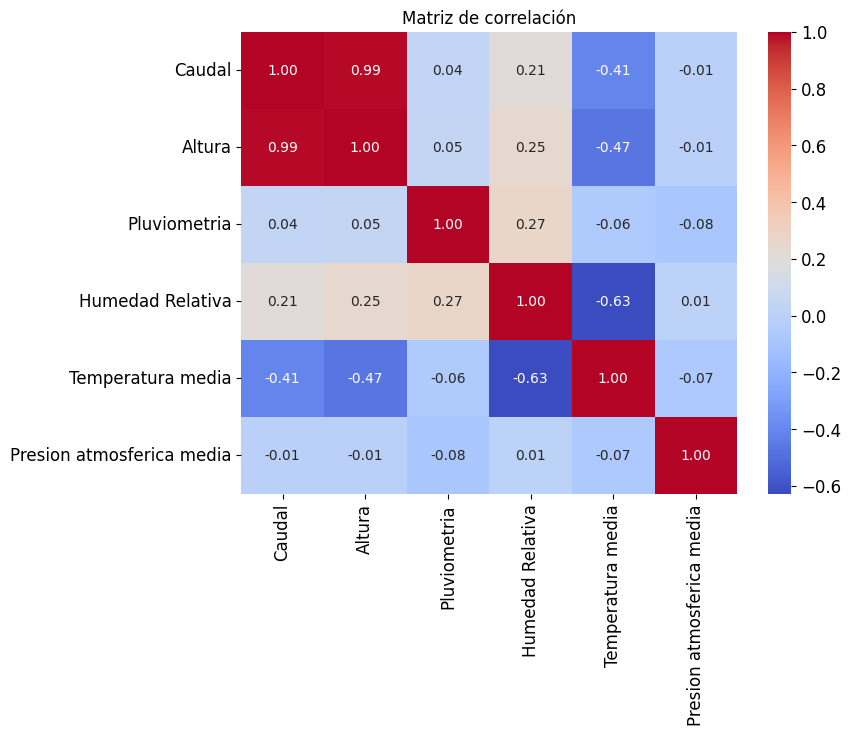

In [53]:

import seaborn as sns
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear un mapa de calor (heatmap) usando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()


C:\Users\cabre\AppData\Local\Temp\ipykernel_7936\3372578068.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  plots.indez = df.index[0:N]


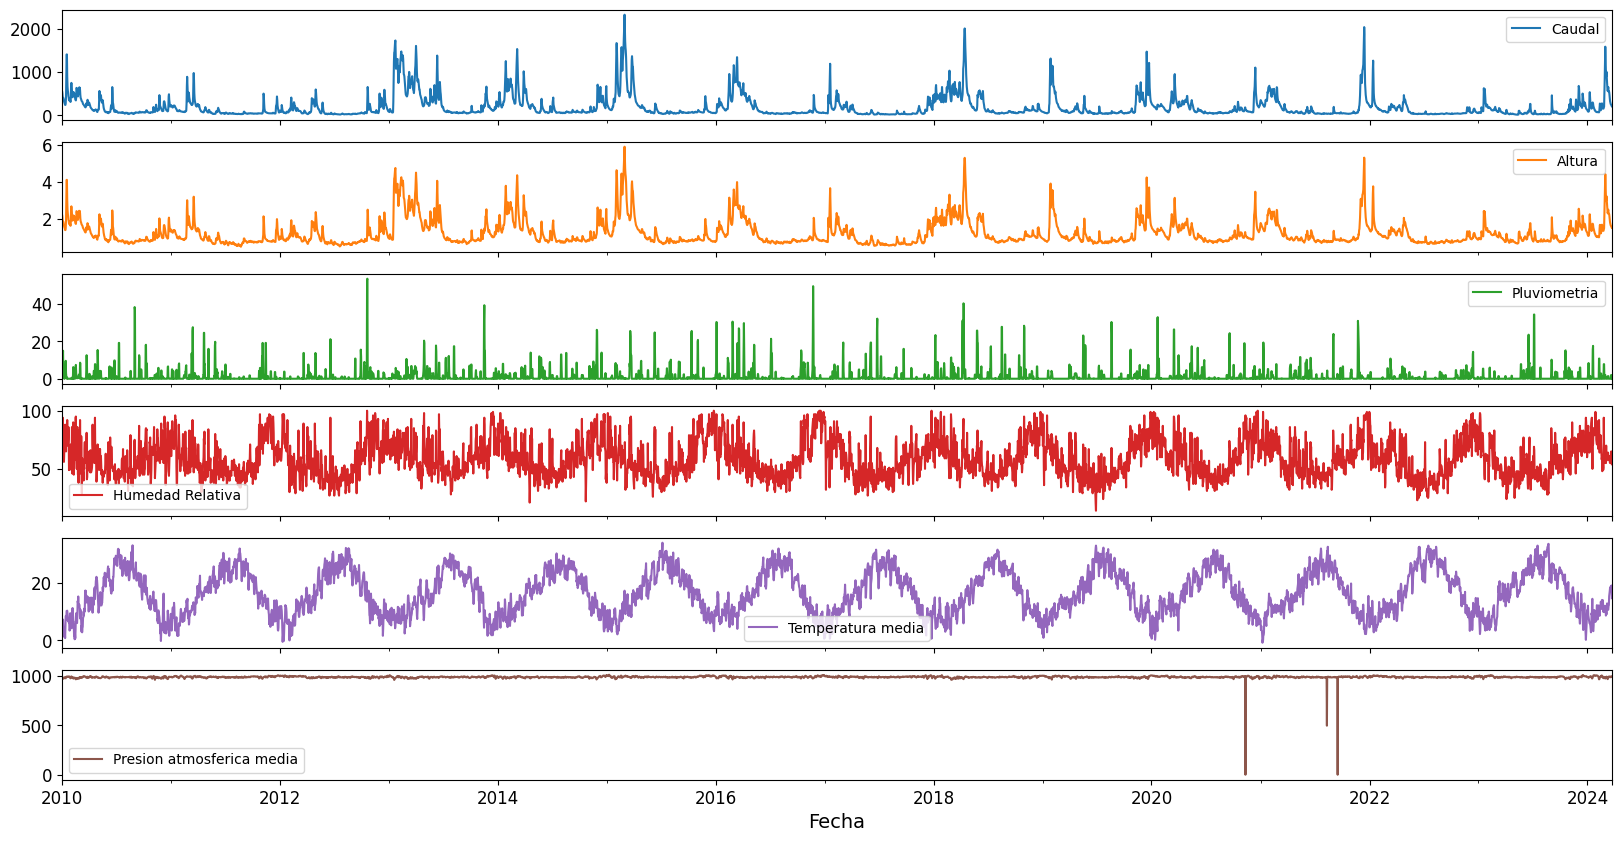

In [54]:
cols = df.columns

N = df.shape[0]
plots = df[cols][0:N]
plots.indez = df.index[0:N]
_=plots.plot(subplots=True, figsize =(20,10))

In [55]:
# Normaliza los datos Caudal
scalerC = MinMaxScaler(feature_range=(0, 1))
caudal = scalerC.fit_transform(df[["Caudal"]])
df["Caudal"] = caudal
# Normaliza los datos Altura
scalerA = MinMaxScaler(feature_range=(0, 1))
altura = scalerA.fit_transform(df[["Altura"]])
df["Altura"] = altura
# Normaliza los datos Pluviometria
scalerP = MinMaxScaler(feature_range=(0, 1))
pluviometria = scalerP.fit_transform(df[["Pluviometria"]])
df["Pluviometria"] = pluviometria
# Normaliza los datos Humedad relativa
scalerHr = MinMaxScaler(feature_range=(0, 1))
pluviometria = scalerHr.fit_transform(df[["Humedad Relativa"]])
df["Humedad Relativa"] = pluviometria
# Normaliza los datos Temperatura media
scalerT = MinMaxScaler(feature_range=(0, 1))
pluviometria = scalerT.fit_transform(df[["Temperatura media"]])
df["Temperatura media"] = pluviometria
# Normaliza los datos Presión atmosferica media 
scalerPA = MinMaxScaler(feature_range=(0, 1))
pluviometria = scalerPA.fit_transform(df[["Presion atmosferica media"]])
df["Presion atmosferica media"] = pluviometria

In [56]:
#Dividimos los datos
def train_val_test_split(dataframe, train_size, valid_size):
    N = dataframe.shape[0]
    N_train = int(train_size*N)
    N_valid = int(valid_size*N)
    N_test = N - N_train - N_valid

    train = dataframe[0:N_train]
    valid = dataframe[N_train:N_train + N_valid]
    test = dataframe[N_train + N_valid:]

    return train, valid, test

In [57]:
trainingSetScaled, validationSetScaled, testSetScaled = train_val_test_split(df,0.8,0.184)

In [58]:
#Tras las particiones, vamos a ver el tamaño de los diferentes set de datos
print(f"Tamaño datos entrenamiento: Train {trainingSetScaled.shape}")
print(f"Tamaño datos entrenamiento: Valid {validationSetScaled.shape}")
print(f"Tamaño datos entrenamiento: Test {testSetScaled.shape}")

Tamaño datos entrenamiento: Train (4156, 6)
Tamaño datos entrenamiento: Valid (956, 6)
Tamaño datos entrenamiento: Test (84, 6)


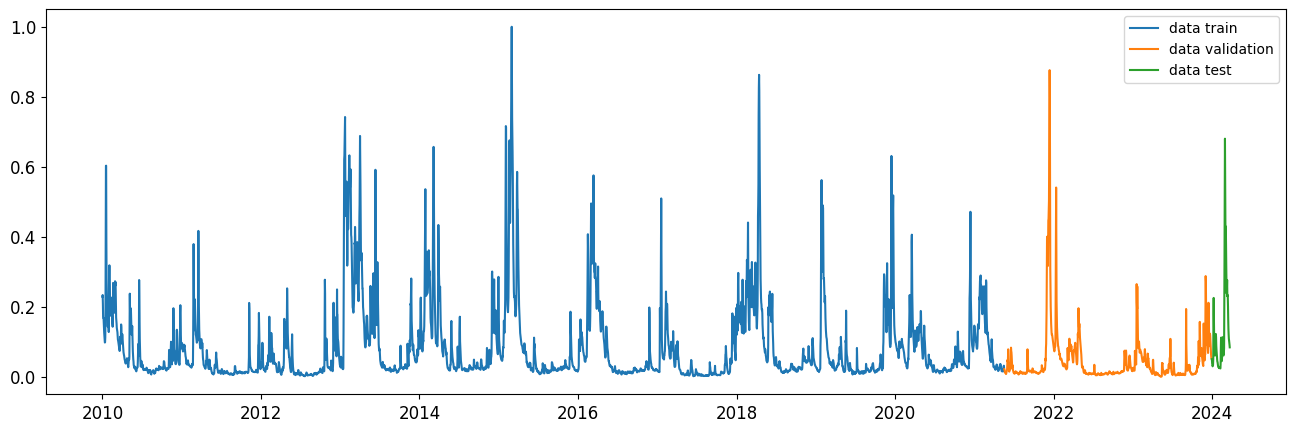

In [59]:
#Dibujamos la división para verificar que se encuentran de manera consecutiva
#Observamos que los parametros de tiempo han sido correctos para la variable objetivo 
fig, ax = plt.subplots(figsize=(16,5))
N = df.shape[0]
ax.plot(trainingSetScaled["Caudal"], label="data train")
ax.plot(validationSetScaled["Caudal"], label="data validation")
ax.plot(testSetScaled["Caudal"], label="data test")
plt.legend();

In [60]:
trainingSet = np.array(trainingSetScaled)
validationSet= np.array(validationSetScaled)
testSet= np.array(testSetScaled)

In [61]:
def crear_dataset_supervisado(array, input_length, output_length):

    # Inicialización
    X, Y = [], []    # Listados que contendrán los datos de entrada y salida del modelo
    shape = array.shape
    if len(shape)==1: # Si tenemos sólo una serie (univariado)
        fils, cols = array.shape[0], 1
        array = array.reshape(fils,cols)
    else: # Multivariado
        fils, cols = array.shape

    # Generar los arreglos
    for i in range(fils-input_length-output_length):
        X.append(array[i:i+input_length,0:cols])
        Y.append(array[i+input_length:i+input_length+output_length,0:1].reshape(output_length,1))
    
    # Convertir listas a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)
    
    return X, Y

In [62]:
#El entrenamiento de nuestra red neuronal recurrente va ser alimentado con bloques de datos
# Nosotros debemos especificar el tamaño de paquetes de datos de entrada y el tamaño de paquetes de salida en cada iteración
INPUT_LENGTH = 30   #Vamos a trabajar con 30 días de datos de entrada
OUTPUT_LENGTH = 5   #Vamos a trabajar con 1 días de datos de salida

X_train, y_train = crear_dataset_supervisado(trainingSet, INPUT_LENGTH, OUTPUT_LENGTH)
X_valid, y_valid  = crear_dataset_supervisado(validationSet, INPUT_LENGTH, OUTPUT_LENGTH)
X_test, y_test = crear_dataset_supervisado(testSet, INPUT_LENGTH, OUTPUT_LENGTH)


In [63]:
#Parametros para la red neurona 
na = 20
output_shape = 1
input_shape =(X_train.shape[1],X_train.shape[2])

In [64]:
input_shape

(30, 6)

# Red SIMPLE RNN

Red SIMPLE RNN que cada 30 días anteriores de entrada, nos predice 1 día

In [65]:
RNN = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences= True, input_shape=input_shape),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(OUTPUT_LENGTH)
])

In [66]:
#Compilación de la red
RNN.compile(loss="mse", optimizer="adamax",metrics=["mae"])
#entrenamiento y validación
historyRNN = RNN.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
129/129 [==============================] - 4s 16ms/step - loss: 0.0494 - mae: 0.1533 - val_loss: 0.0144 - val_mae: 0.0821
Epoch 2/20
129/129 [==============================] - 2s 13ms/step - loss: 0.0161 - mae: 0.0854 - val_loss: 0.0093 - val_mae: 0.0669
Epoch 3/20
129/129 [==============================] - 2s 13ms/step - loss: 0.0116 - mae: 0.0705 - val_loss: 0.0081 - val_mae: 0.0607
Epoch 4/20
129/129 [==============================] - 2s 12ms/step - loss: 0.0099 - mae: 0.0639 - val_loss: 0.0068 - val_mae: 0.0565
Epoch 5/20
129/129 [==============================] - 2s 13ms/step - loss: 0.0085 - mae: 0.0586 - val_loss: 0.0050 - val_mae: 0.0451
Epoch 6/20
129/129 [==============================] - 2s 12ms/step - loss: 0.0075 - mae: 0.0535 - val_loss: 0.0046 - val_mae: 0.0438
Epoch 7/20
129/129 [==============================] - 2s 12ms/step - loss: 0.0068 - mae: 0.0501 - val_loss: 0.0045 - val_mae: 0.0415
Epoch 8/20
129/129 [==============================] - 2s 12ms/step - 

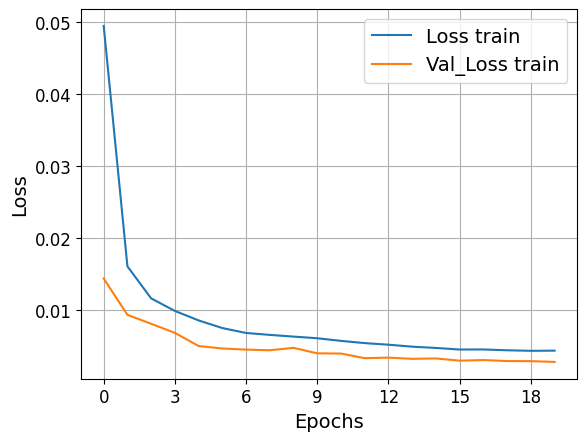

In [67]:
# Graficamos los resultados de modelo 
plt.plot(historyRNN.history["loss"],label="Loss train")
plt.plot(historyRNN.history["val_loss"],label="Val_Loss train")
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)      

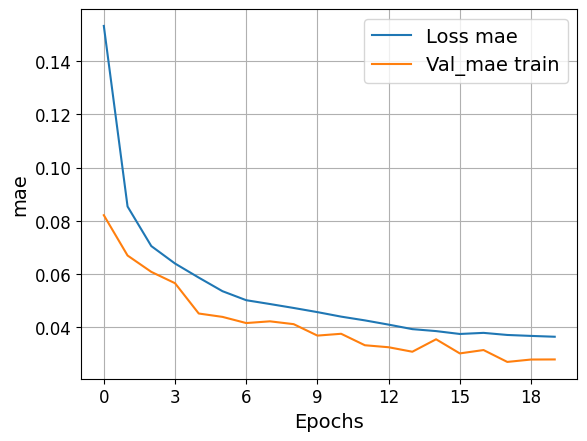

In [68]:
plt.plot(historyRNN.history["mae"],label="Loss mae")
plt.plot(historyRNN.history["val_mae"],label="Val_mae train")
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("mae")
plt.grid(True)      

In [69]:
realidad = scalerC.inverse_transform(testSetScaled[["Caudal"]])

In [70]:
RNNpred = RNN.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [71]:
RNNpred = scalerC.inverse_transform(RNNpred)

In [72]:
realidad = realidad.reshape(-1)

In [73]:
realidad= realidad[INPUT_LENGTH-1:-6]

In [74]:
RNNpred = pd.DataFrame(RNNpred)
realidad = pd.DataFrame(realidad)
RNNpred = RNNpred.astype(float)
realidad = realidad.astype(float)

In [75]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score,mean_absolute_percentage_error
def metricas(y_test, y_pred):
    mse_list = []
    rmse_list = []
    mae_list = []
    mape_list = []
    output_length = range(y_pred.shape[1])
    for i in output_length:
        test_mse = mean_squared_error(y_test, y_pred[i])
        test_rmse = np.sqrt(test_mse)  # RMSE es la raíz cuadrada del MSE
        test_mae = mean_absolute_error(y_test, y_pred[i])
        test_mape = mean_absolute_percentage_error(y_test, y_pred[i])
        mse_list.append(test_mse)
        rmse_list.append(test_rmse)
        mae_list.append(test_mae)
        mape_list.append(test_mape)
        
        print(f"Predicción día {i+1}")
        print(f"Testing RNN MSE: {test_mse:.4f}")
        print(f"Testing RNN RMSE: {test_rmse:.4f}")
        print(f"Testing RNN MAE: {test_mae:.4f}")
        print(f"Testing RNN MAPE: {test_mape:.4f}%")  # Multiplicamos por 100 para obtener el porcentaje
    return mse_list, rmse_list, mae_list, mape_list

In [76]:
mse_list, rmse_list, mae_list, mape_list= metricas(realidad,RNNpred)

Predicción día 1
Testing RNN MSE: 21306.6917
Testing RNN RMSE: 145.9681
Testing RNN MAE: 81.2168
Testing RNN MAPE: 0.2981%
Predicción día 2
Testing RNN MSE: 35990.2033
Testing RNN RMSE: 189.7108
Testing RNN MAE: 110.9524
Testing RNN MAPE: 0.5003%
Predicción día 3
Testing RNN MSE: 25800.9961
Testing RNN RMSE: 160.6269
Testing RNN MAE: 86.4243
Testing RNN MAPE: 0.3341%
Predicción día 4
Testing RNN MSE: 16743.3530
Testing RNN RMSE: 129.3961
Testing RNN MAE: 89.5082
Testing RNN MAPE: 0.4072%
Predicción día 5
Testing RNN MSE: 22247.9732
Testing RNN RMSE: 149.1575
Testing RNN MAE: 98.2846
Testing RNN MAPE: 0.4722%


In [77]:
def graficar_metricas(dias, mse_list, rmse_list, mae_list, mape_list):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))  # Dos subplots verticales
    
    # Primer subplot para MSE y MAPE
    ax1.plot(dias, mse_list, 'b-', label='MSE')
    ax1.set_xlabel('Días')
    ax1.set_ylabel('MSE')
    ax1.legend(loc='upper left')
    
    ax1_2 = ax1.twinx()
    ax1_2.plot(dias, mape_list, 'm-', label='MAPE')
    ax1_2.set_ylabel('MAPE (%)')
    ax1_2.legend(loc='upper right')
    
    # Segundo subplot para RMSE y MAE
    ax2.plot(dias, rmse_list, 'r-', label='RMSE')
    ax2.set_xlabel('Días')
    ax2.set_ylabel('RMSE')
    ax2.legend(loc='upper left')
    
    ax2_2 = ax2.twinx()
    ax2_2.plot(dias, mae_list, 'g-', label='MAE')
    ax2_2.set_ylabel('MAE')
    ax2_2.legend(loc='upper right')
    
    # Título general
    fig.suptitle('Métricas de predicción por día')
    
    # Ajustar el espacio entre subplots
    plt.tight_layout()
    
    # Mostrar la gráfica
    plt.show()


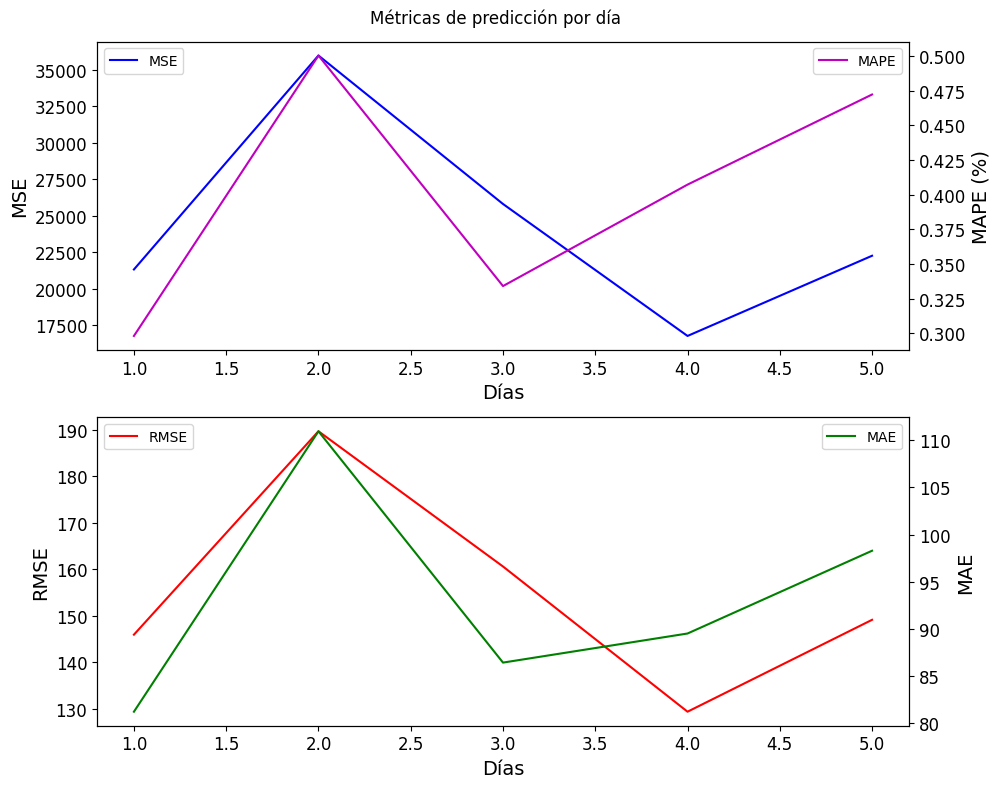

In [78]:
# Definir los días
dias = list(range(1, len(mse_list) + 1))

# Graficar las métricas
graficar_metricas(dias, mse_list, rmse_list, mae_list, mape_list)

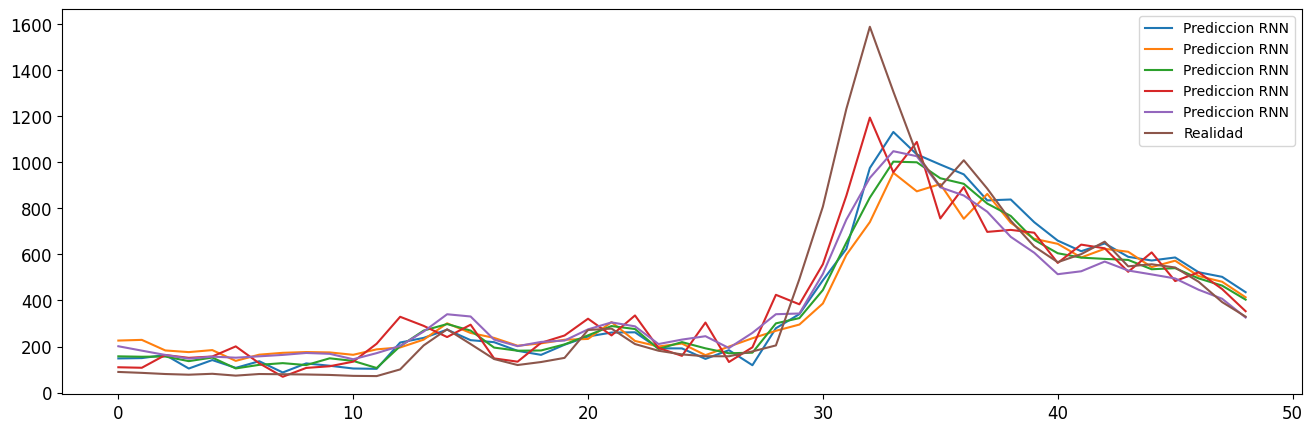

In [79]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(RNNpred, label="Prediccion RNN")
ax.plot(realidad, label="Realidad")# cada 30 días, nos predice 1 salida (0 al 29, empezamos en el día 29)
plt.legend();

# Red LSTM

Red LSTM que cada 30 días anteriores de entrada, nos predice 1 día de salida 

In [80]:
LSTM = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=input_shape),
    keras.layers.LSTM(20),
    keras.layers.Dense(OUTPUT_LENGTH)
])

In [81]:
#Compilación de la red
LSTM.compile(loss="mse", optimizer="adamax",metrics=["mae"])
#entrenamiento y validación
historyLSTM = LSTM.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
129/129 [==============================] - 7s 31ms/step - loss: 0.0091 - mae: 0.0592 - val_loss: 0.0049 - val_mae: 0.0395
Epoch 2/20
129/129 [==============================] - 3s 24ms/step - loss: 0.0064 - mae: 0.0470 - val_loss: 0.0047 - val_mae: 0.0377
Epoch 3/20
129/129 [==============================] - 3s 24ms/step - loss: 0.0060 - mae: 0.0449 - val_loss: 0.0043 - val_mae: 0.0331
Epoch 4/20
129/129 [==============================] - 3s 25ms/step - loss: 0.0058 - mae: 0.0436 - val_loss: 0.0041 - val_mae: 0.0322
Epoch 5/20
129/129 [==============================] - 3s 24ms/step - loss: 0.0055 - mae: 0.0423 - val_loss: 0.0040 - val_mae: 0.0332
Epoch 6/20
129/129 [==============================] - 3s 24ms/step - loss: 0.0053 - mae: 0.0408 - val_loss: 0.0041 - val_mae: 0.0356
Epoch 7/20
129/129 [==============================] - 3s 25ms/step - loss: 0.0051 - mae: 0.0403 - val_loss: 0.0037 - val_mae: 0.0317
Epoch 8/20
129/129 [==============================] - 3s 25ms/step - 

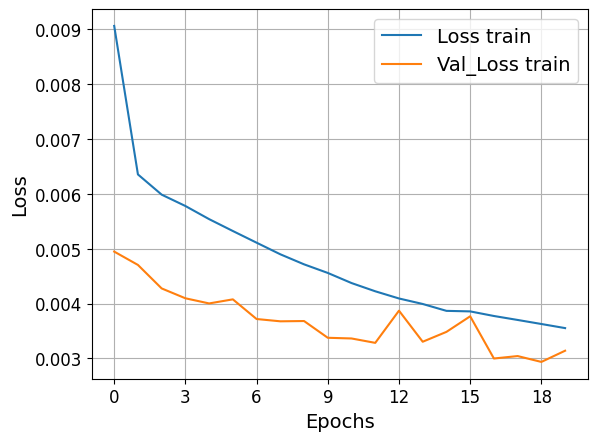

In [82]:
# Graficamos los resultados de modelo 
plt.plot(historyLSTM.history["loss"],label="Loss train")
plt.plot(historyLSTM.history["val_loss"],label="Val_Loss train")
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)      

In [83]:
LSTMpred = LSTM.predict(X_test)

2/2 [==============================] - 1s 9ms/step


In [84]:
LSTMpred = scalerC.inverse_transform(LSTMpred)

In [85]:
LSTMpred= pd.DataFrame(LSTMpred)
LSTMpred = LSTMpred.astype(float)

In [86]:
mse_list, rmse_list, mae_list, mape_list= metricas(realidad,LSTMpred)

Predicción día 1
Testing RNN MSE: 17256.5537
Testing RNN RMSE: 131.3642
Testing RNN MAE: 76.2522
Testing RNN MAPE: 0.2827%
Predicción día 2
Testing RNN MSE: 22860.3739
Testing RNN RMSE: 151.1965
Testing RNN MAE: 96.4754
Testing RNN MAPE: 0.4676%
Predicción día 3
Testing RNN MSE: 33506.6332
Testing RNN RMSE: 183.0482
Testing RNN MAE: 116.0088
Testing RNN MAPE: 0.4999%
Predicción día 4
Testing RNN MSE: 34692.1476
Testing RNN RMSE: 186.2583
Testing RNN MAE: 135.7669
Testing RNN MAPE: 0.6457%
Predicción día 5
Testing RNN MSE: 50301.5179
Testing RNN RMSE: 224.2800
Testing RNN MAE: 155.2060
Testing RNN MAPE: 0.7022%


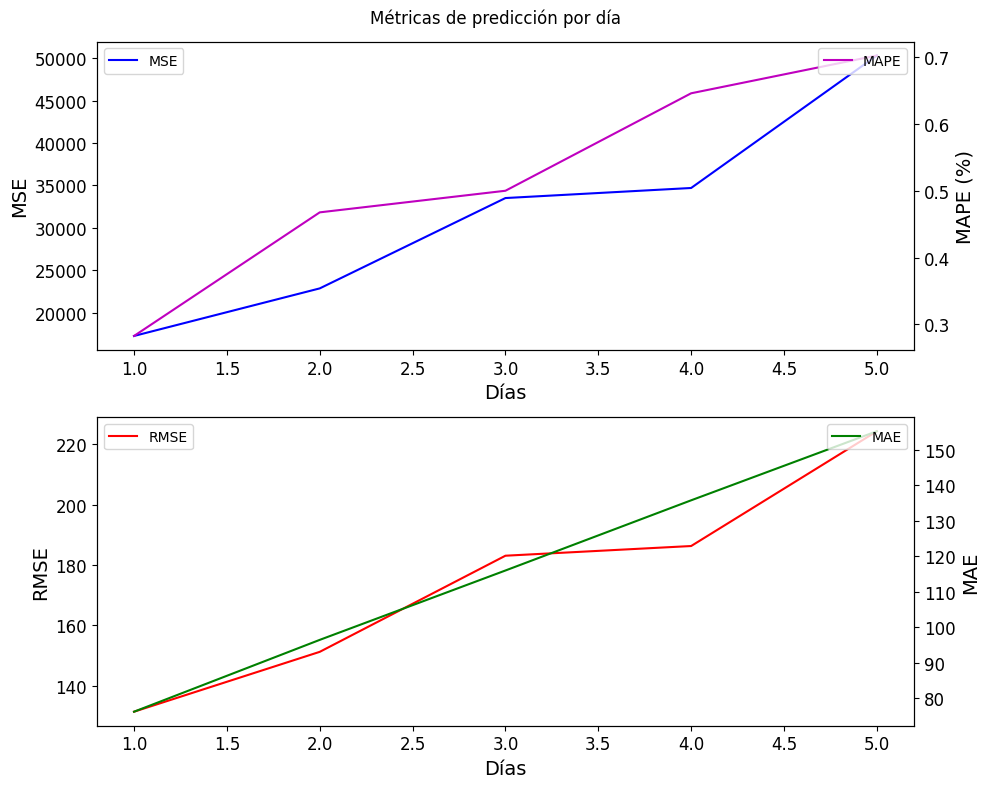

In [87]:
# Graficar las métricas
graficar_metricas(dias, mse_list, rmse_list, mae_list, mape_list)

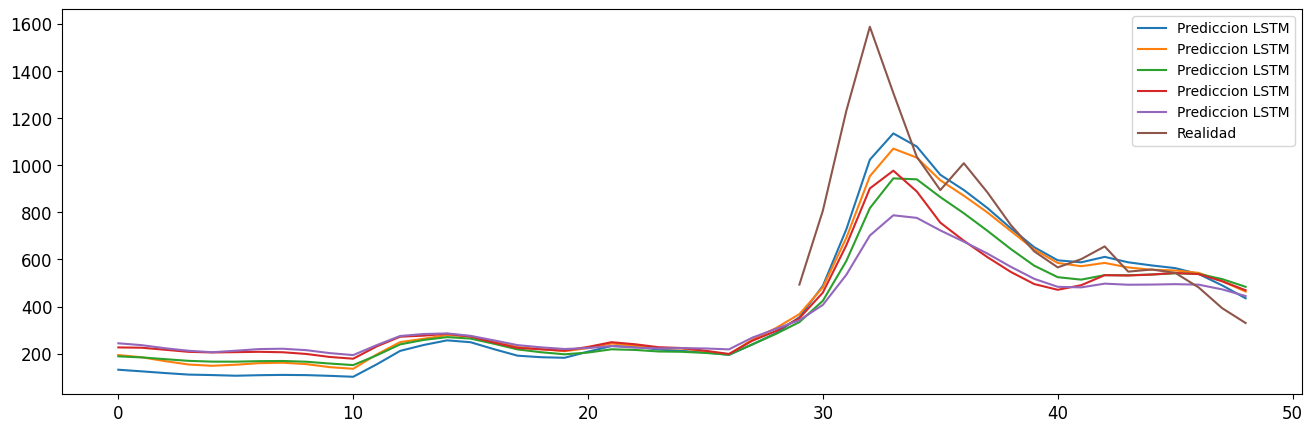

In [88]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(LSTMpred, label="Prediccion LSTM")
ax.plot(realidad[INPUT_LENGTH-1:] , label="Realidad")# cada 30 días, nos predice 1 salida (0 al 29, empezamos en el día 29)
plt.legend();

# Red GRU

Red GRU que cada 30 días anteriores de entrada, nos predice 1 día

In [89]:
GRU = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape= input_shape),
    keras.layers.GRU(20),
    keras.layers.Dense(OUTPUT_LENGTH)
])

In [90]:
#Compilación de la red
GRU.compile(loss="mse", optimizer="adamax",metrics=["mae"])
#entrenamiento y validación
historyGRU = GRU.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
129/129 [==============================] - 9s 37ms/step - loss: 0.0117 - mae: 0.0683 - val_loss: 0.0040 - val_mae: 0.0370
Epoch 2/20
129/129 [==============================] - 4s 28ms/step - loss: 0.0051 - mae: 0.0406 - val_loss: 0.0033 - val_mae: 0.0330
Epoch 3/20
129/129 [==============================] - 3s 26ms/step - loss: 0.0045 - mae: 0.0375 - val_loss: 0.0029 - val_mae: 0.0276
Epoch 4/20
129/129 [==============================] - 4s 28ms/step - loss: 0.0042 - mae: 0.0356 - val_loss: 0.0028 - val_mae: 0.0280
Epoch 5/20
129/129 [==============================] - 4s 29ms/step - loss: 0.0040 - mae: 0.0345 - val_loss: 0.0028 - val_mae: 0.0284
Epoch 6/20
129/129 [==============================] - 4s 29ms/step - loss: 0.0039 - mae: 0.0336 - val_loss: 0.0026 - val_mae: 0.0264
Epoch 7/20
129/129 [==============================] - 3s 27ms/step - loss: 0.0038 - mae: 0.0334 - val_loss: 0.0026 - val_mae: 0.0263
Epoch 8/20
129/129 [==============================] - 4s 28ms/step - 

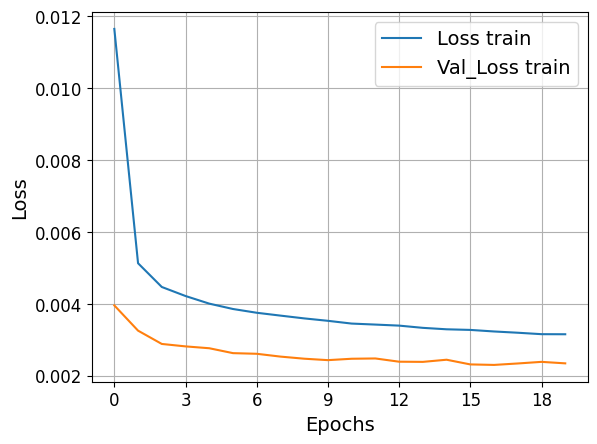

In [91]:
# Graficamos los resultados de modelo 
plt.plot(historyGRU.history["loss"],label="Loss train")
plt.plot(historyGRU.history["val_loss"],label="Val_Loss train")
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)   

In [92]:
GRUpred = GRU.predict(X_test)

2/2 [==============================] - 1s 9ms/step


In [93]:
GRUpred = scalerC.inverse_transform(GRUpred)

In [94]:
GRUpred = pd.DataFrame(GRUpred)
GRUpred = GRUpred.astype(float)

In [95]:
mse_list, rmse_list, mae_list, mape_list= metricas(realidad,GRUpred)

Predicción día 1
Testing RNN MSE: 2870.5937
Testing RNN RMSE: 53.5779
Testing RNN MAE: 48.5757
Testing RNN MAPE: 0.2822%
Predicción día 2
Testing RNN MSE: 6842.8242
Testing RNN RMSE: 82.7214
Testing RNN MAE: 54.1975
Testing RNN MAPE: 0.2302%
Predicción día 3
Testing RNN MSE: 11007.8367
Testing RNN RMSE: 104.9182
Testing RNN MAE: 81.8954
Testing RNN MAPE: 0.4449%
Predicción día 4
Testing RNN MSE: 17009.3716
Testing RNN RMSE: 130.4200
Testing RNN MAE: 83.1952
Testing RNN MAPE: 0.3027%
Predicción día 5
Testing RNN MSE: 24254.8105
Testing RNN RMSE: 155.7396
Testing RNN MAE: 104.2907
Testing RNN MAPE: 0.4347%


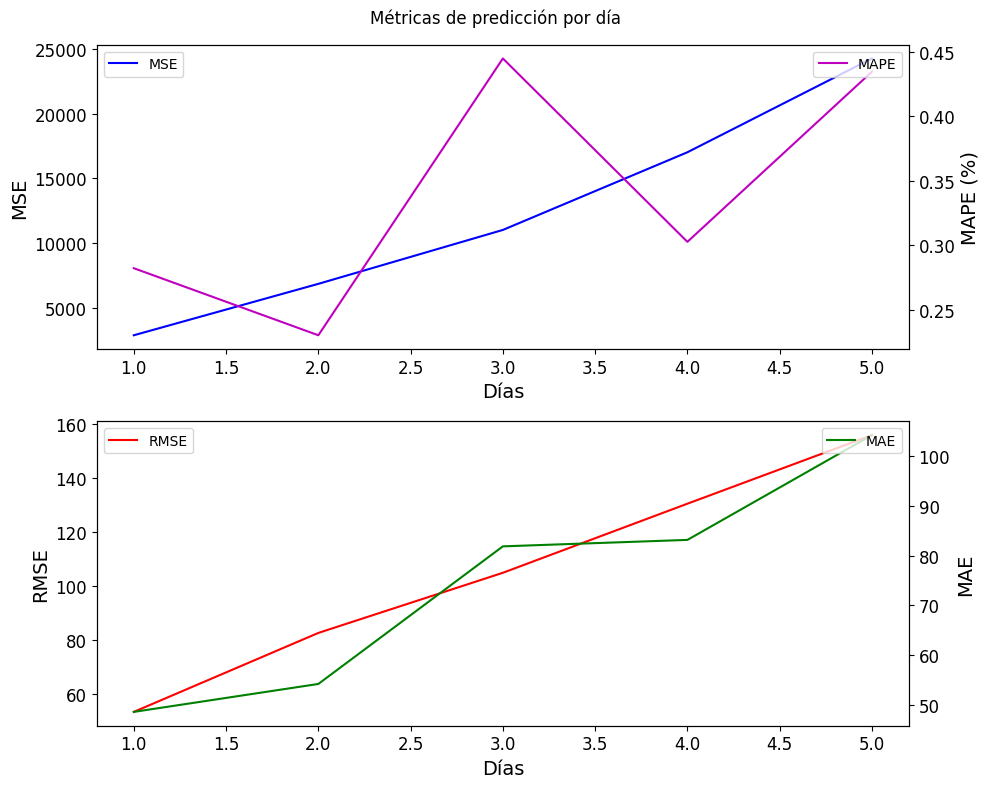

In [96]:
# Graficar las métricas
graficar_metricas(dias, mse_list, rmse_list, mae_list, mape_list)

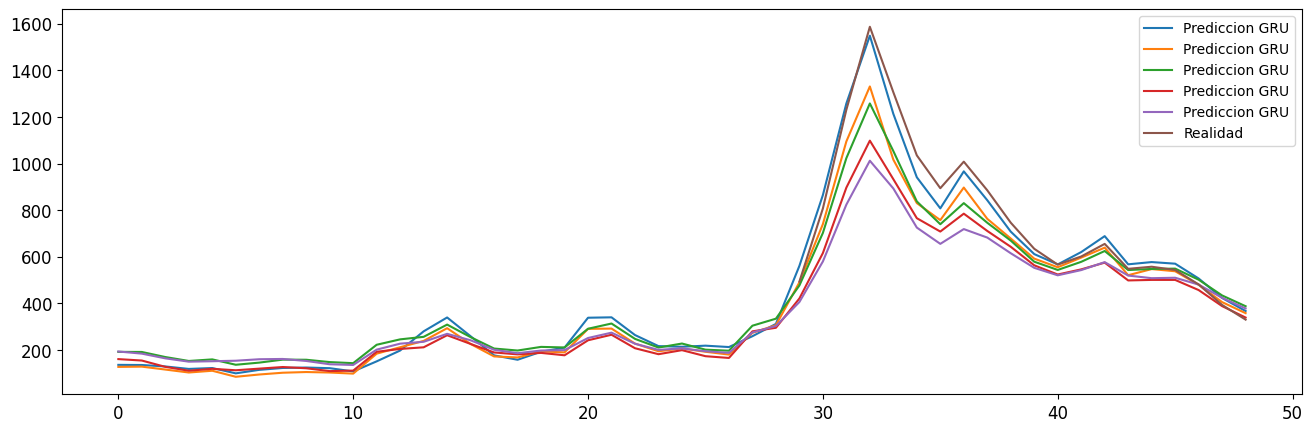

In [97]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(GRUpred, label="Prediccion GRU")
ax.plot(realidad[INPUT_LENGTH-1:] , label="Realidad")# cada 30 días, nos predice 1 salida (0 al 29, empezamos en el día 29)
plt.legend();

# Comparativa final de los modelos RNN, LSTM y GRU

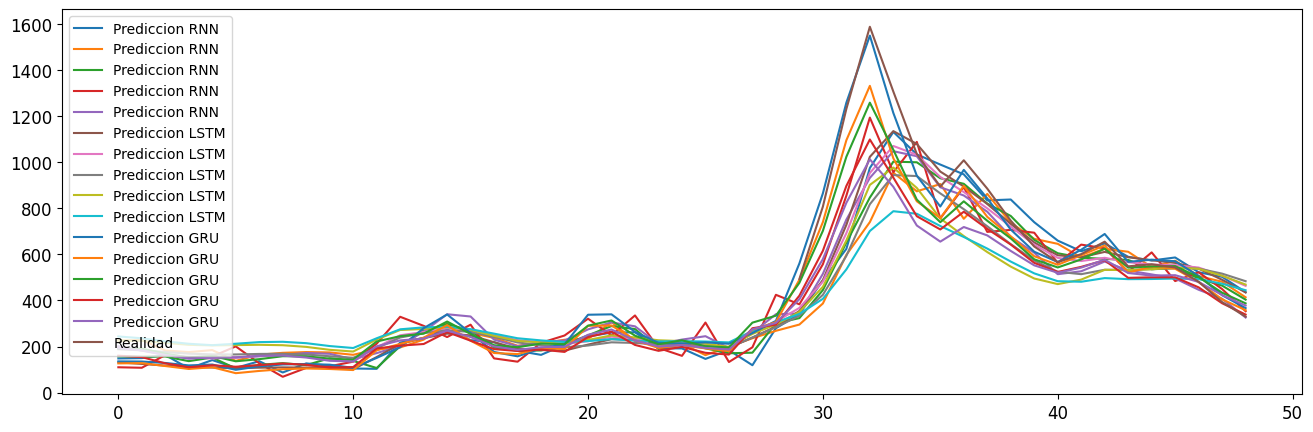

In [98]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(RNNpred, label="Prediccion RNN")
ax.plot(LSTMpred, label="Prediccion LSTM")
ax.plot(GRUpred, label="Prediccion GRU")
ax.plot(realidad[INPUT_LENGTH-1:] , label="Realidad")
plt.legend();